<a href="https://colab.research.google.com/github/Ebraheem-03/AddMeProject/blob/main/axon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 12006 images belonging to 10 classes.
Found 4005 images belonging to 10 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


376/376 ━━━━━━━━━━━━━━━━━━━━ 62s 139ms/step - accuracy: 0.2451 - loss: 2.1085 - val_accuracy: 0.3830 - val_loss: 1.8437
Epoch 2/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 73s 121ms/step - accuracy: 0.3599 - loss: 1.8169 - val_accuracy: 0.4132 - val_loss: 1.6765
Epoch 3/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 82s 120ms/step - accuracy: 0.4378 - loss: 1.6270 - val_accuracy: 0.5156 - val_loss: 1.4637
Epoch 4/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 92s 146ms/step - accuracy: 0.4821 - loss: 1.4871 - val_accuracy: 0.4639 - val_loss: 1.4990
Epoch 5/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 82s 145ms/step - accuracy: 0.5070 - loss: 1.4034 - val_accuracy: 0.5581 - val_loss: 1.2910
Epoch 6/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 54s 144ms/step - accuracy: 0.5461 - loss: 1.3187 - val_accuracy: 0.5718 - val_loss: 1.2520
Epoch 7/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 45s 118ms/step - accuracy: 0.5596 - loss: 1.2769 - val_accuracy: 0.5820 - val_loss: 1.2091
Epoch 8/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 45s 118ms/step - accuracy: 0.5697 - loss: 1.2440 - val

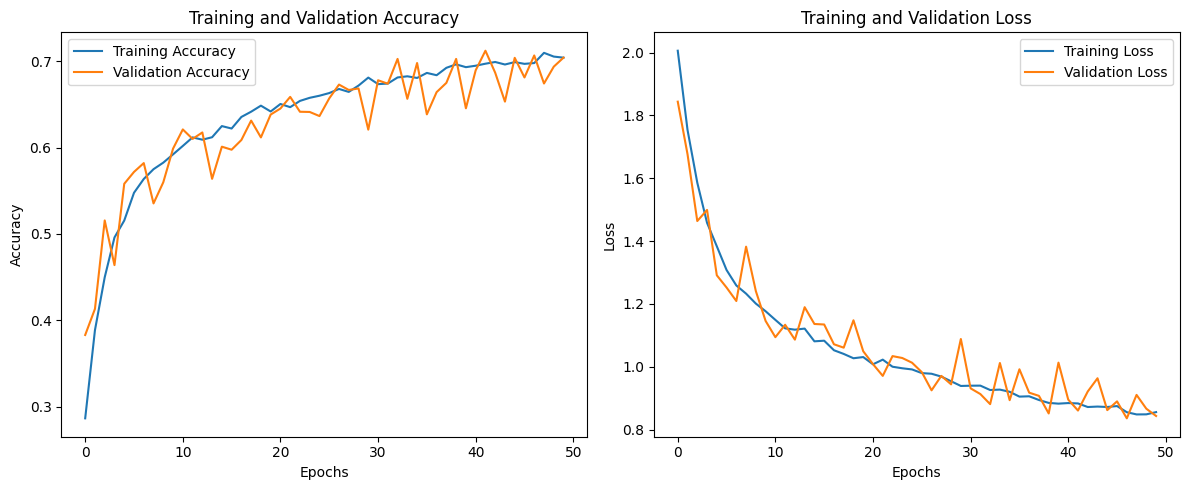

126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step
Classification Report:
                                              precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.74      0.86      0.80       532
                        Tomato_Early_blight       0.48      0.24      0.32       250
                         Tomato_Late_blight       0.62      0.63      0.63       478
                           Tomato_Leaf_Mold       0.70      0.38      0.49       238
                  Tomato_Septoria_leaf_spot       0.53      0.71      0.60       443
Tomato_Spider_mites_Two_spotted_spider_mite       0.89      0.52      0.65       419
                        Tomato__Target_Spot       0.53      0.82      0.65       351
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.85      0.83      0.84       802
                Tomato__Tomato_mosaic_virus       0.60      0.65      0.63        94
                             Tomato_healthy       0.94      0.92      0.93       

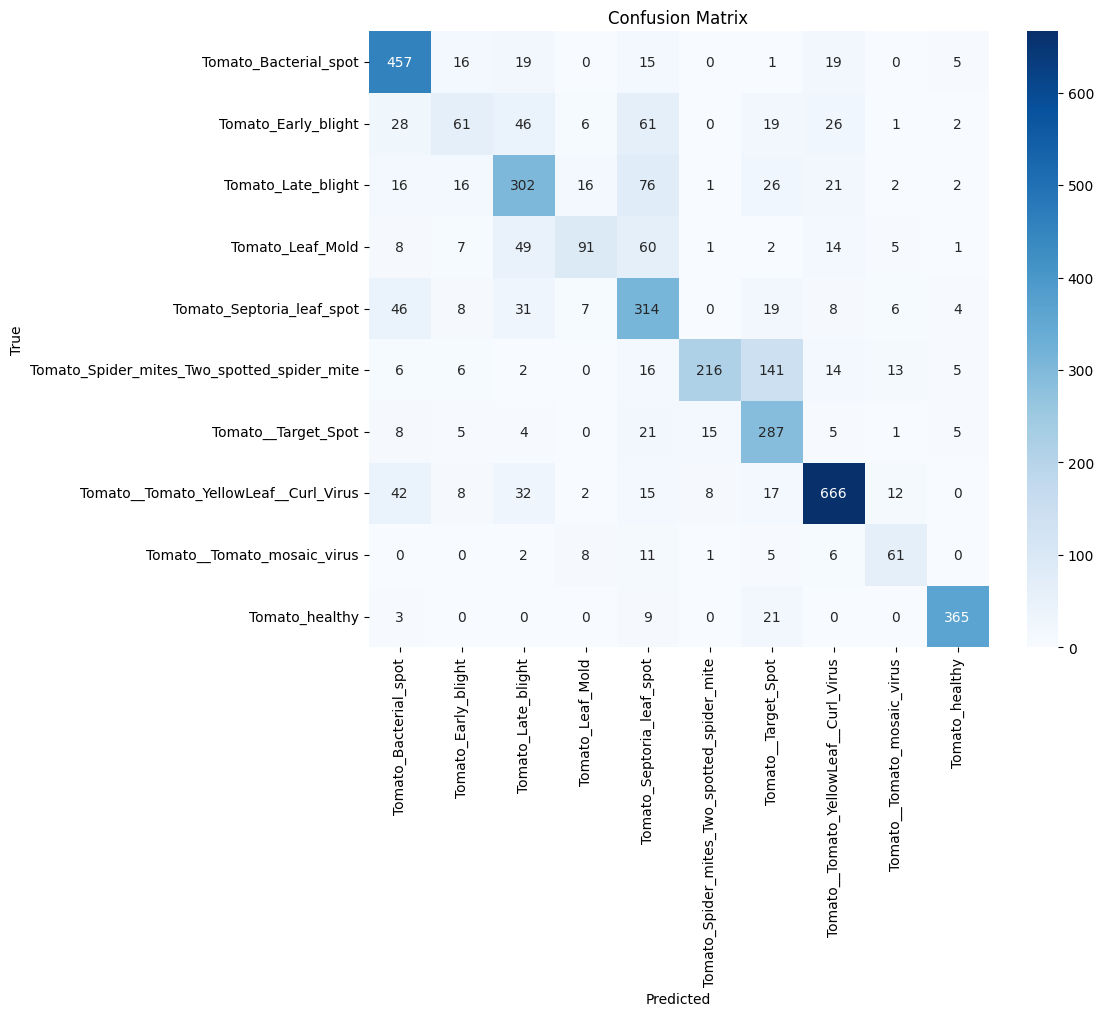

Total number of misclassified images: 1185
Overall accuracy: 70.41%


In [7]:
# Step 1: Install and import required libraries
!pip install tensorflow matplotlib scikit-learn

import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Step 2: Define paths and create directories for train/test splits
base_dir = '/content/tomato/PlantVillage'
train_dir = '/content/tomato/train'
test_dir = '/content/tomato/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Step 3: Function to split data into train and test sets for each class
def split_data_per_class(base_class_path, train_class_path, test_class_path, train_size=0.75):
    images = os.listdir(base_class_path)
    images = [img for img in images if img.lower().endswith(('png', 'jpg', 'jpeg'))]
    train_images, test_images = train_test_split(images, train_size=train_size, random_state=42)

    for img in train_images:
        shutil.copy(os.path.join(base_class_path, img), os.path.join(train_class_path, img))
    for img in test_images:
        shutil.copy(os.path.join(base_class_path, img), os.path.join(test_class_path, img))

# Step 4: Split data for each class
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory (class)
        train_class_path = os.path.join(train_dir, class_name)
        test_class_path = os.path.join(test_dir, class_name)

        os.makedirs(train_class_path, exist_ok=True)
        os.makedirs(test_class_path, exist_ok=True)

        split_data_per_class(class_path, train_class_path, test_class_path)

# Step 5: Data preprocessing and standardization
datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Step 6: Load and configure the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model

history = model.fit(
    train_generator,
    epochs=50,  # Adjust epochs as needed
    validation_data=test_generator,
)

# Step 8: Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 9: Evaluate the model and display metrics
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

# Step 10: Plot the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 11: Calculate and display misclassification metrics
num_misclassified = np.sum(true_classes != predicted_classes)
total_images = len(true_classes)
accuracy_percentage = (1 - num_misclassified / total_images) * 100

print(f"Total number of misclassified images: {num_misclassified}")
print(f"Overall accuracy: {accuracy_percentage:.2f}%")
